#### Team: Rasgulla Warriors
* Harsha V - PES1UG22AM063
* Namita Achyuthan - PES1UG22AM100
* Shusrith S - PES1UG22AM155
* Siddhi Zanwar - PES1UG22AM161

# Social Computing Assignment 1

## An Exploration of The Aeneid

The *Aeneid* is an epic by Virgil that follows Aeneas, a Trojan hero, as he escapes the fall of Troy and seeks to establish a new homeland in Italy. After a storm, he lands in North Africa, where he falls in love with Queen Dido of Carthage. Aeneas leaves Dido to pursue his destiny, leading to her tragic suicide. Upon arriving in Italy, he battles local ruler Turnus, ultimately defeating him to fulfill his mission of founding Rome. The poem explores themes of duty, fate, and the struggles of founding a nation.

### Loading the Story

In [3]:
# We start off by downloading the text file from Project Gutenberg
!wget https://www.gutenberg.org/cache/epub/228/pg228.txt

--2024-09-20 02:55:04--  https://www.gutenberg.org/cache/epub/228/pg228.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 746807 (729K) [text/plain]
Saving to: ‘pg228.txt.1’

pg228.txt.1         100%[===================>] 729.30K  --.-KB/s    in 0.1s    

2024-09-20 02:55:05 (5.07 MB/s) - ‘pg228.txt.1’ saved [746807/746807]



In [4]:
path = '/content/pg228.txt'
with open(f'{path}', 'r') as f:
    text = f.read()
# Some rudimentary web scraping here- we're getting all the text into one variable

### Importing our libraries:
- `networkx` is a powerful library used for the creation, manipulation, and study of complex networks and graphs
- `matplotlib.pyplot` is for creating cool visualizations in Python
- `Combinations` from itertools is for generating all possible combinations of a specified length from a given iterable
- `girvan_newman` is a function that implements the Girvan-Newman algorithm. More on that later.
- `matplotlib.colors` is arounf to provide a collection of color maps
- `random` is just used to introduce randomness by coming up with pseudorandom numbers.

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from networkx.algorithms.community import girvan_newman
import matplotlib.colors as mcolors
import random

## Part - 1

### a. Pick your top characters and list them
- This code snippet defines a list of characters from Virgil's *Aeneid*, along with brief descriptions of their roles in the epic
- The subsequent code replaces character names in a given text with their respective names formatted with underscores and splits the text into sentences for further processing.

In [6]:
characters = [
    "Aeneas",            # The Trojan hero and protagonist of the epic
    "Dido",              # The queen of Carthage who falls in love with Aeneas
    "Turnus",            # The Rutulian leader and Aeneas's chief antagonist
    "Juno",              # The queen of the gods who opposes Aeneas
    "Venus",             # The goddess of love and Aeneas's mother
    "Jupiter",           # The king of the gods
    "Neptune",           # The god of the sea
    "Mercury",           # The messenger of the gods
    "Ascanius",          # Aeneas's son
    "Anchises",          # Aeneas's father
    "Creusa",            # Aeneas's wife, who dies during the fall of Troy
    "Priam",             # The king of Troy
    "Hector",            # A Trojan prince and warrior, killed by Achilles
    "Achilles",          # The Greek hero whose ghost appears in the underworld
    "Amata",             # The wife of Latinus and mother of Lavinia
    "Lavinia",           # The daughter of Latinus, whom Aeneas marries
    "Latinus",           # The king of the Latins and father of Lavinia
    "Pallas",            # The young ally of Aeneas, killed by Turnus
    "Evander",           # The king of Pallanteum, an ally of Aeneas
    "Camilla",           # The warrior queen of the Volscians, allied with Turnus
    "Nisus",             # A Trojan warrior who undertakes a dangerous mission
    "Euryalus",          # Nisus's companion, who also participates in the mission
    "Tarchon",           # An ally of Aeneas, leader of the Etruscans
    "Sergestus",         # A minor Trojan figure who aids Aeneas
]

In [ ]:
# replace the names of characters with the names in the list
for i in range(len(characters)):
    text = text.replace(characters[i], characters[i].replace(' ', '_'))

# split the text into sentences
sentences = text.split('.')

# remove the last element of the list as it is empty
sentences = sentences[:-1]

### b. Forming the graph

Here we use the co-occurrence algorithm to analyze character interactions within the sentences we've extracted.

#### Steps Followed:

1. **Co-occurrence Detection**:
   - The code iterates through each sentence and checks for the presence of character names.
   - *When two characters appear in the same sentence, a co-occurrence pair is recorded.*

2. **Graph Construction**:
   - A graph is created using NetworkX, where characters are nodes and co-occurrences form edges between them.

3. **Graph Analysis**:
   - The number of nodes (characters) and edges (co-occurrences) is printed, along with a summary of the graph structure.
   - The graph is saved in GEXF format for further use.

4. **Visualization**:
   - Two visualizations are generated: one for the entire graph and another focusing on the largest connected component, which highlights the most significant interactions among characters.

5. **Text Preprocessing**:
   - The preprocessed text is saved to a file for potential future analysis or reference.


In [7]:
# using co-occurrence algorithm to find the co-occurrence of characters in the sentences
co_occurrence = []

for i in range(len(sentences)):
    for j in range(len(characters)):
        if characters[j] in sentences[i]:
            for k in range(len(characters)):
                if characters[k] in sentences[i] and characters[j] != characters[k]:
                    co_occurrence.append((characters[j], characters[k]))

# create a graph
G = nx.Graph()

# add nodes to the graph
G.add_nodes_from(characters)

# add edges to the graph
G.add_edges_from(co_occurrence)

# find number of nodes and edges
print('Number of nodes:', G.number_of_nodes())
print('Number of edges:', G.number_of_edges())

# summary of the graph
print(str(G))

Number of nodes: 24
Number of edges: 68
Graph with 24 nodes and 68 edges


In [8]:
# write the graph to a file
nx.write_gexf(G, 'graph.gexf')

# save preprocessed text to a file (you can preprocess differently if you want/need to)
with open(f'preprocessed.txt', 'w') as f:
    f.write(text)

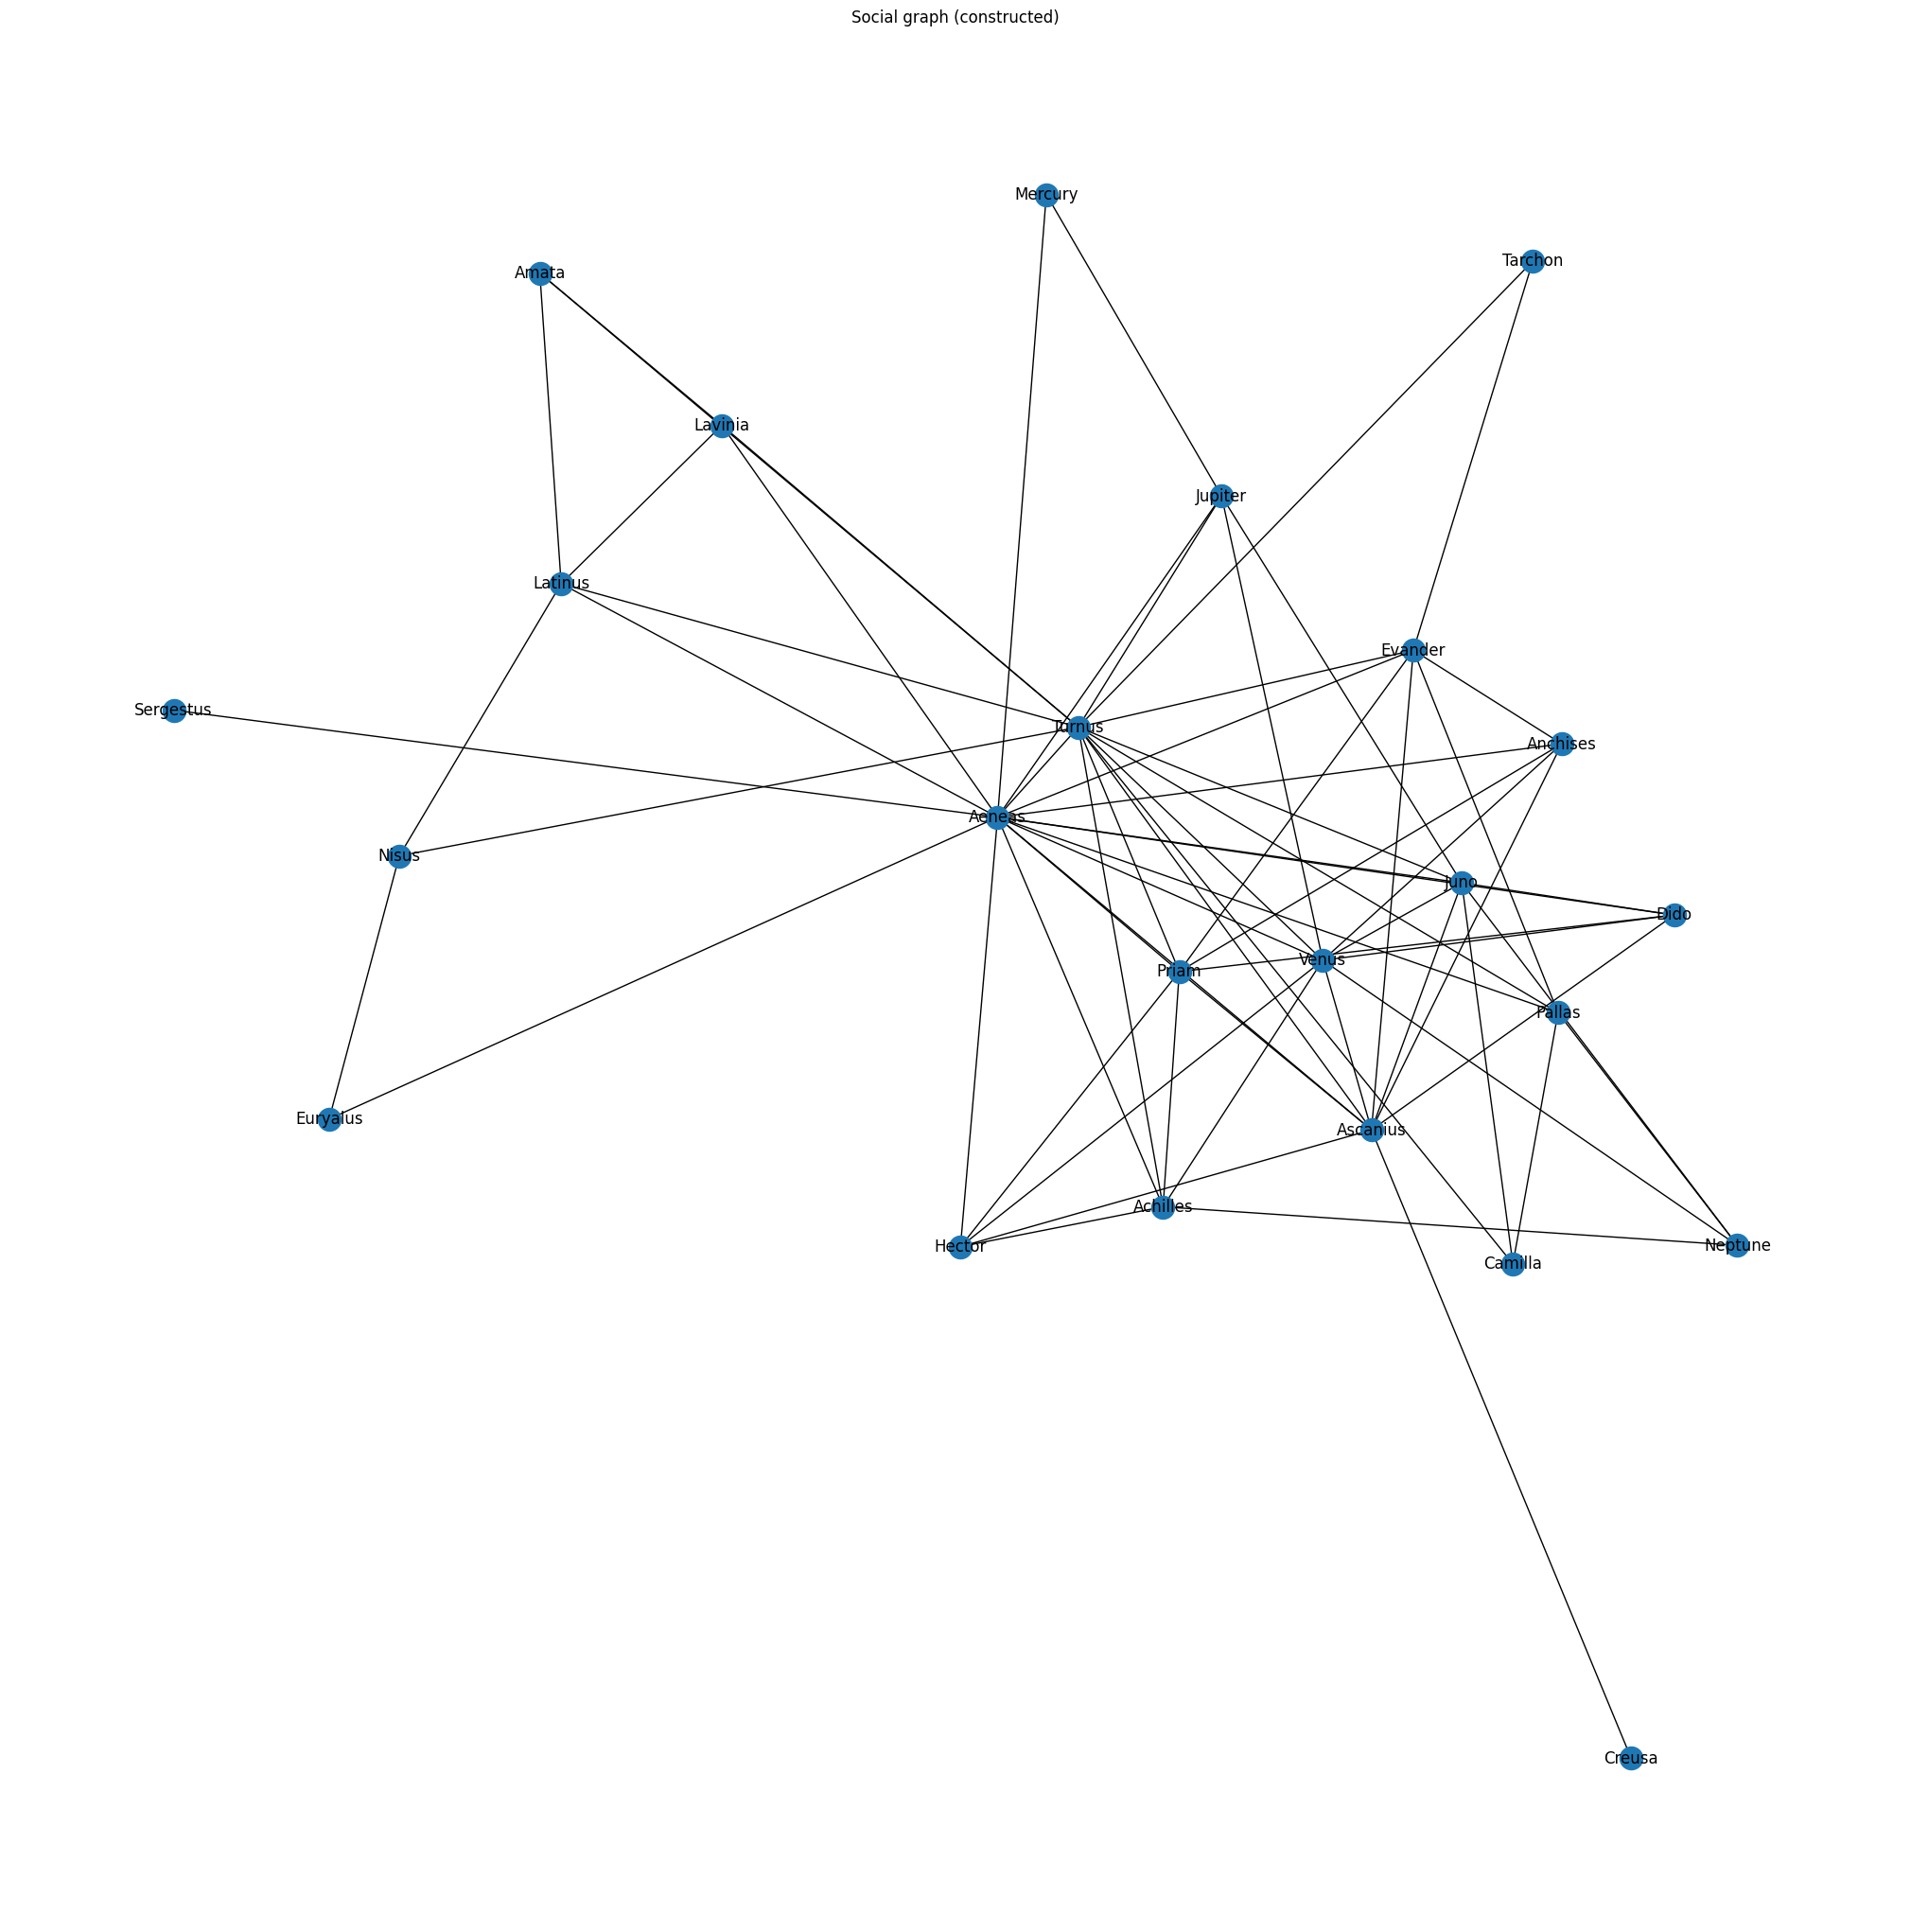

In [ ]:
# view graph
plt.figure(figsize=(20, 20))
nx.draw(G, with_labels=True)
plt.title("Social graph (constructed)")
plt.show()

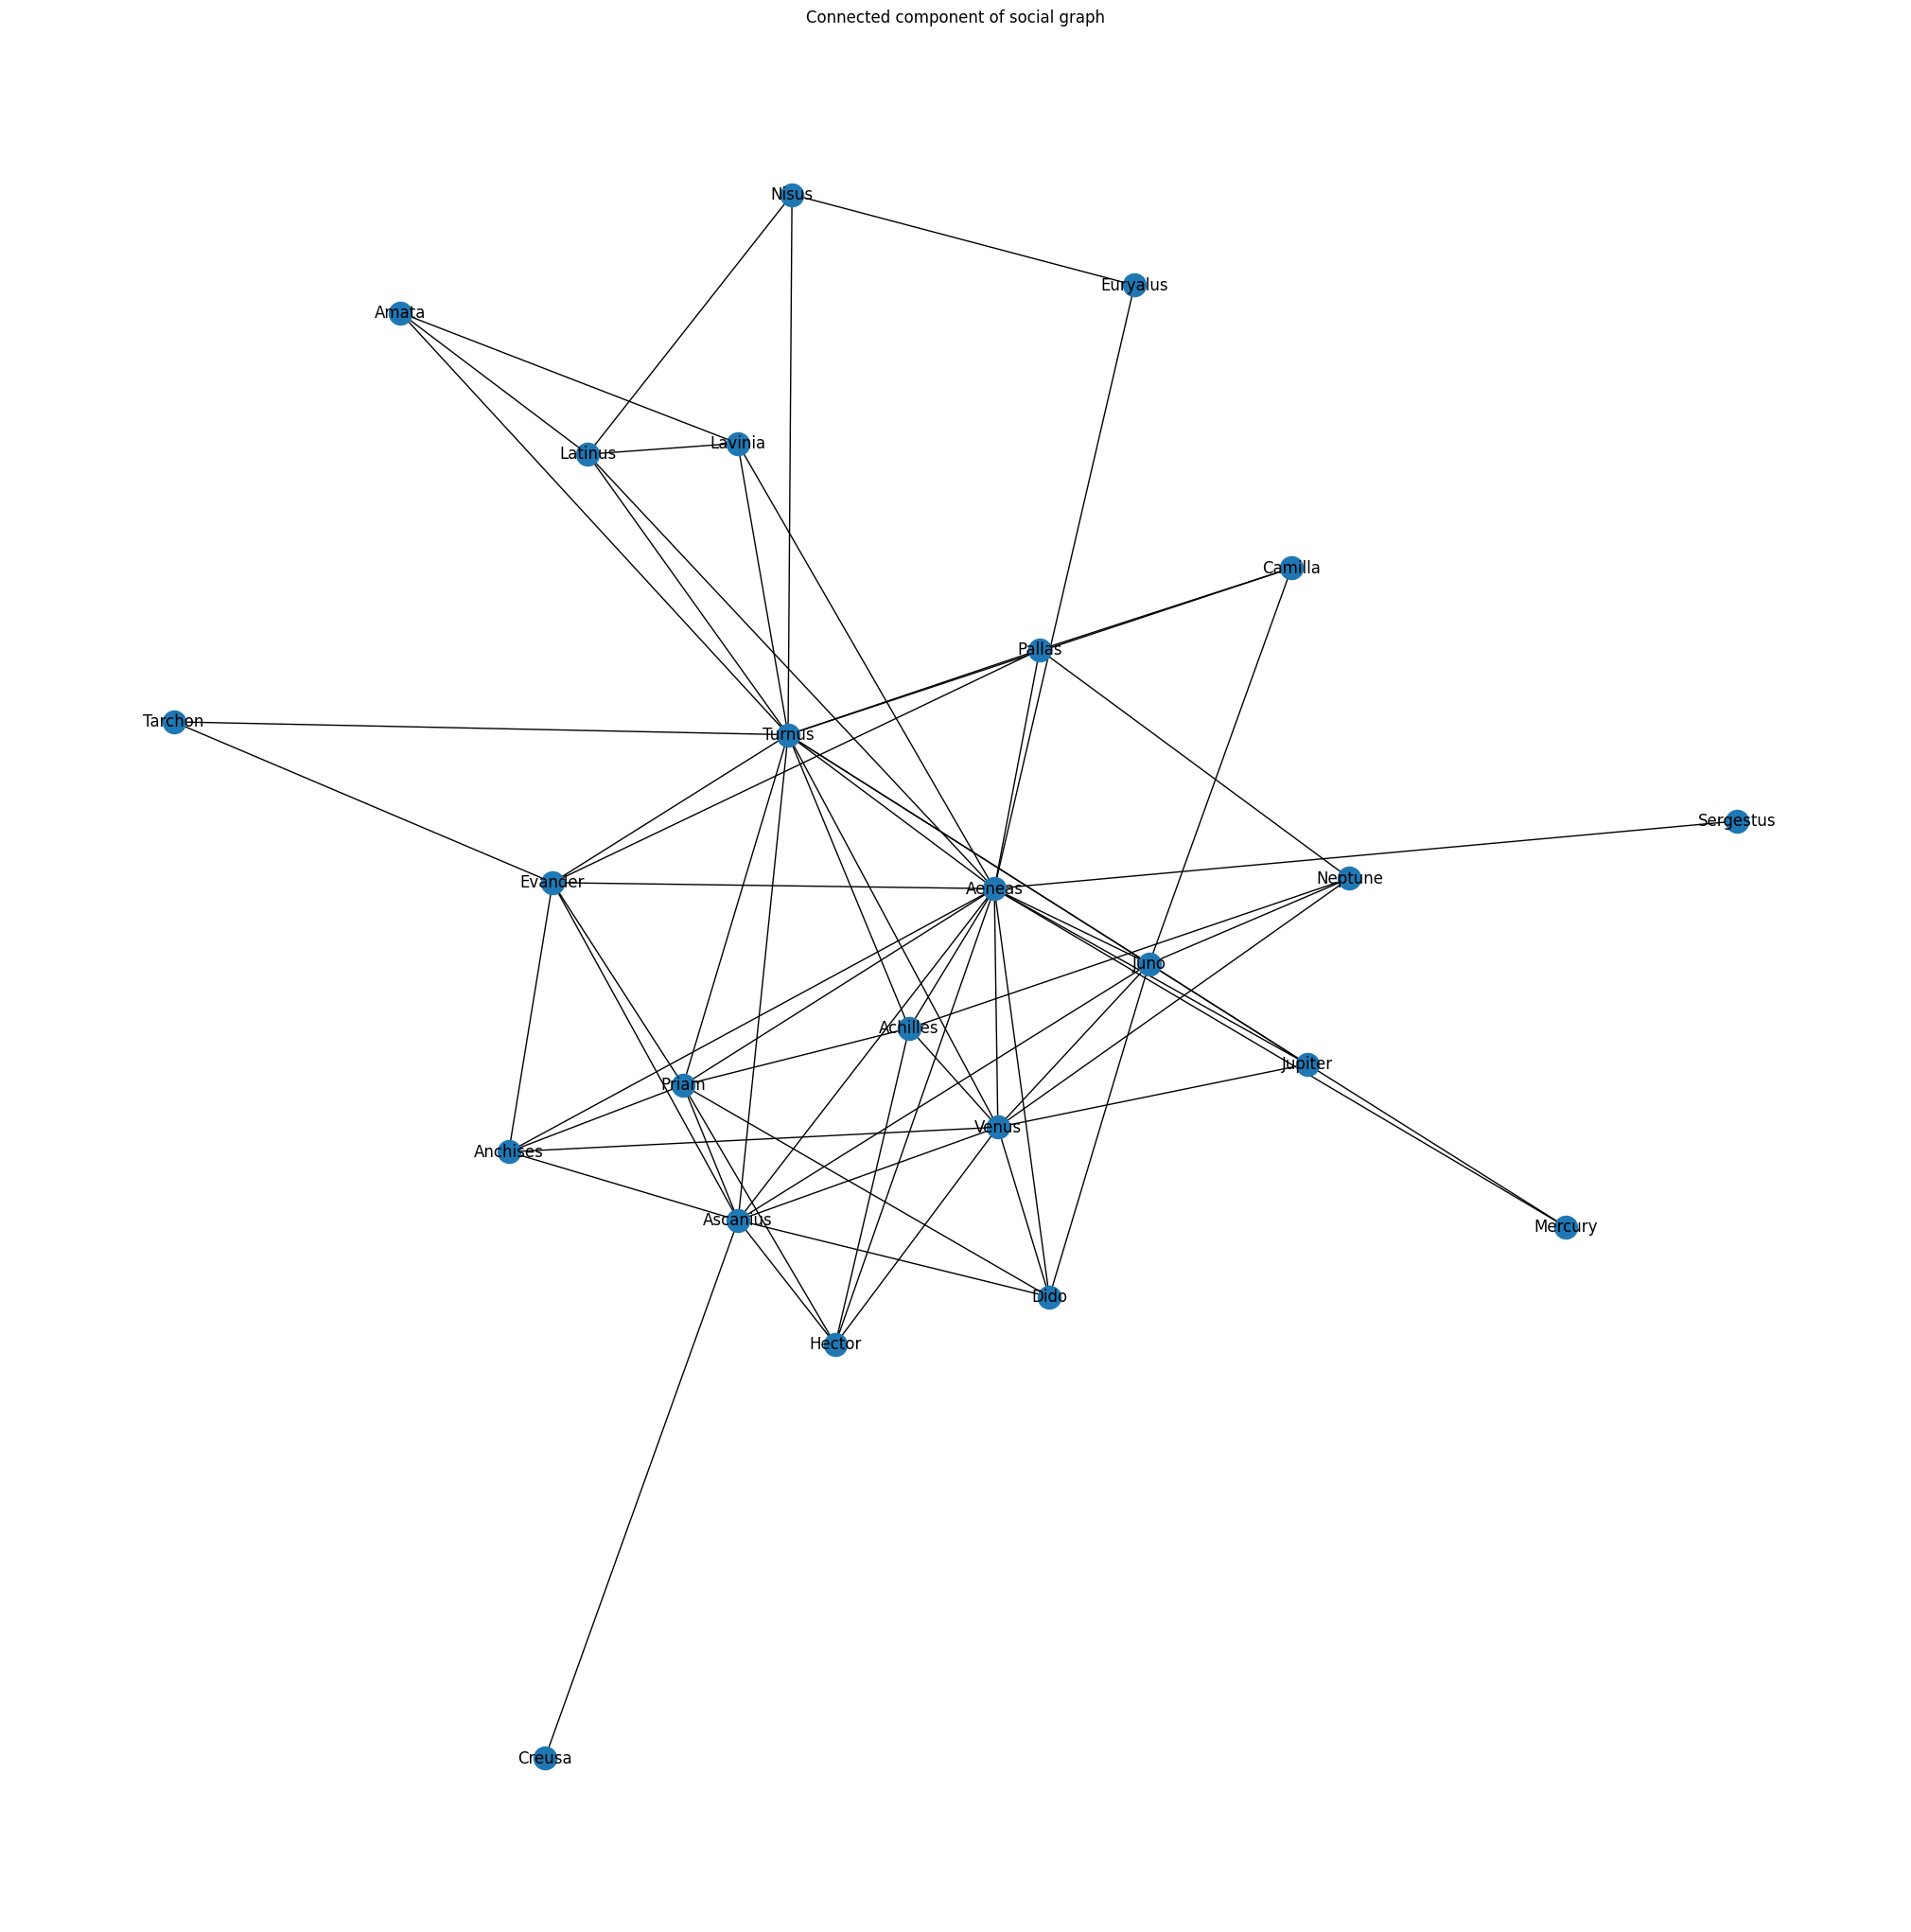

In [ ]:
# Get largest connected component
largest_cc = max(nx.connected_components(G), key=len)

# Create a subgraph containing only the largest connected component
G_connected = G.subgraph(largest_cc).copy()

# view graph clearly
plt.figure(figsize=(20, 20))
nx.draw(G_connected, with_labels=True)
plt.title("Connected component of social graph")
plt.show()

### c. Centrality

1. **Degree Centrality**:
   - This metric indicates how many direct connections a character has.
   - A higher degree centrality suggests that a character is more connected to others in the network.
   - Calculated using `nx.degree_centrality(G)`.

2. **Betweenness Centrality**:
   - This measure reflects how often a character acts as a bridge along the shortest path between two other characters.
   - Characters with high betweenness centrality may have significant influence over the flow of information in the network.
   - Calculated using `nx.betweenness_centrality(G)`.

3. **Closeness Centrality**:
   - Closeness centrality measures how quickly a character can access other characters in the network.
   - A higher value indicates that a character can reach others more efficiently.
   - Calculated using `nx.closeness_centrality(G)`.

4. **PageRank**:
   - PageRank assesses the importance of nodes based on their connections, considering both the quantity and quality of links.
   - It is often used to rank web pages but is applicable here to evaluate character significance.
   - Calculated using `nx.pagerank(G)`.

In [ ]:
degree_centrality = nx.degree_centrality(G)
degree_centrality

{'Aeneas': 0.7391304347826086,
 'Dido': 0.21739130434782608,
 'Turnus': 0.6521739130434783,
 'Juno': 0.34782608695652173,
 'Venus': 0.43478260869565216,
 'Jupiter': 0.21739130434782608,
 'Neptune': 0.17391304347826086,
 'Mercury': 0.08695652173913043,
 'Ascanius': 0.43478260869565216,
 'Anchises': 0.21739130434782608,
 'Creusa': 0.043478260869565216,
 'Priam': 0.34782608695652173,
 'Hector': 0.21739130434782608,
 'Achilles': 0.2608695652173913,
 'Amata': 0.13043478260869565,
 'Lavinia': 0.17391304347826086,
 'Latinus': 0.21739130434782608,
 'Pallas': 0.21739130434782608,
 'Evander': 0.30434782608695654,
 'Camilla': 0.13043478260869565,
 'Nisus': 0.13043478260869565,
 'Euryalus': 0.08695652173913043,
 'Tarchon': 0.08695652173913043,
 'Sergestus': 0.043478260869565216}

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality

{'Aeneas': 0.35196687370600416,
 'Dido': 0.0015527950310559005,
 'Turnus': 0.2795815295815296,
 'Juno': 0.04516751364577451,
 'Venus': 0.05163121902252336,
 'Jupiter': 0.01212121212121212,
 'Neptune': 0.004611330698287219,
 'Mercury': 0.0,
 'Ascanius': 0.10845410628019325,
 'Anchises': 0.0015527950310559005,
 'Creusa': 0.0,
 'Priam': 0.019703243616287093,
 'Hector': 0.0021456804065499717,
 'Achilles': 0.018700985005332828,
 'Amata': 0.0,
 'Lavinia': 0.006107660455486543,
 'Latinus': 0.016167890080933556,
 'Pallas': 0.023693456302151954,
 'Evander': 0.030839450404667793,
 'Camilla': 0.0009881422924901185,
 'Nisus': 0.007839262187088273,
 'Euryalus': 0.005317146621494447,
 'Tarchon': 0.0,
 'Sergestus': 0.0}

In [ ]:
closeness_centrality = nx.closeness_centrality(G)
closeness_centrality

{'Aeneas': 0.7931034482758621,
 'Dido': 0.5227272727272727,
 'Turnus': 0.7419354838709677,
 'Juno': 0.6052631578947368,
 'Venus': 0.6388888888888888,
 'Jupiter': 0.5476190476190477,
 'Neptune': 0.45098039215686275,
 'Mercury': 0.46,
 'Ascanius': 0.6388888888888888,
 'Anchises': 0.5227272727272727,
 'Creusa': 0.39655172413793105,
 'Priam': 0.6052631578947368,
 'Hector': 0.5111111111111111,
 'Achilles': 0.5609756097560976,
 'Amata': 0.45098039215686275,
 'Lavinia': 0.5227272727272727,
 'Latinus': 0.5348837209302325,
 'Pallas': 0.5476190476190477,
 'Evander': 0.5897435897435898,
 'Camilla': 0.46938775510204084,
 'Nisus': 0.46,
 'Euryalus': 0.46938775510204084,
 'Tarchon': 0.45098039215686275,
 'Sergestus': 0.45098039215686275}

In [ ]:
pagerank = nx.pagerank(G)
pagerank

{'Aeneas': 0.11830890493310475,
 'Dido': 0.0353566921818827,
 'Turnus': 0.10325315075091433,
 'Juno': 0.055248706812103414,
 'Venus': 0.06655525697062413,
 'Jupiter': 0.03741755005640534,
 'Neptune': 0.030048216929901526,
 'Mercury': 0.01852625725146767,
 'Ascanius': 0.06974628896630157,
 'Anchises': 0.035531188009320765,
 'Creusa': 0.012178339201498908,
 'Priam': 0.05398371694324316,
 'Hector': 0.035410145539881394,
 'Achilles': 0.04181409104765308,
 'Amata': 0.025692943722456965,
 'Lavinia': 0.03207244771773261,
 'Latinus': 0.03985808077682806,
 'Pallas': 0.03733639138025911,
 'Evander': 0.04977995769824824,
 'Camilla': 0.024318554877930332,
 'Nisus': 0.027340349374716584,
 'Euryalus': 0.01991163501323557,
 'Tarchon': 0.01814579943087529,
 'Sergestus': 0.012165334413414438}

### d. Ego Network and local clustering coefficient

1. **Ego Networks**:
   - An ego network for each character is created using `nx.ego_graph(G, char)`, which includes the character and their direct connections.

2. **Local Clustering Coefficient**:
   - The local clustering coefficient quantifies how closely connected a character's neighbors are to each other.
   - A higher coefficient indicates a more tightly-knit group among a character's connections.
   - The coefficients are calculated using `nx.clustering(ego_graph)` for each character.

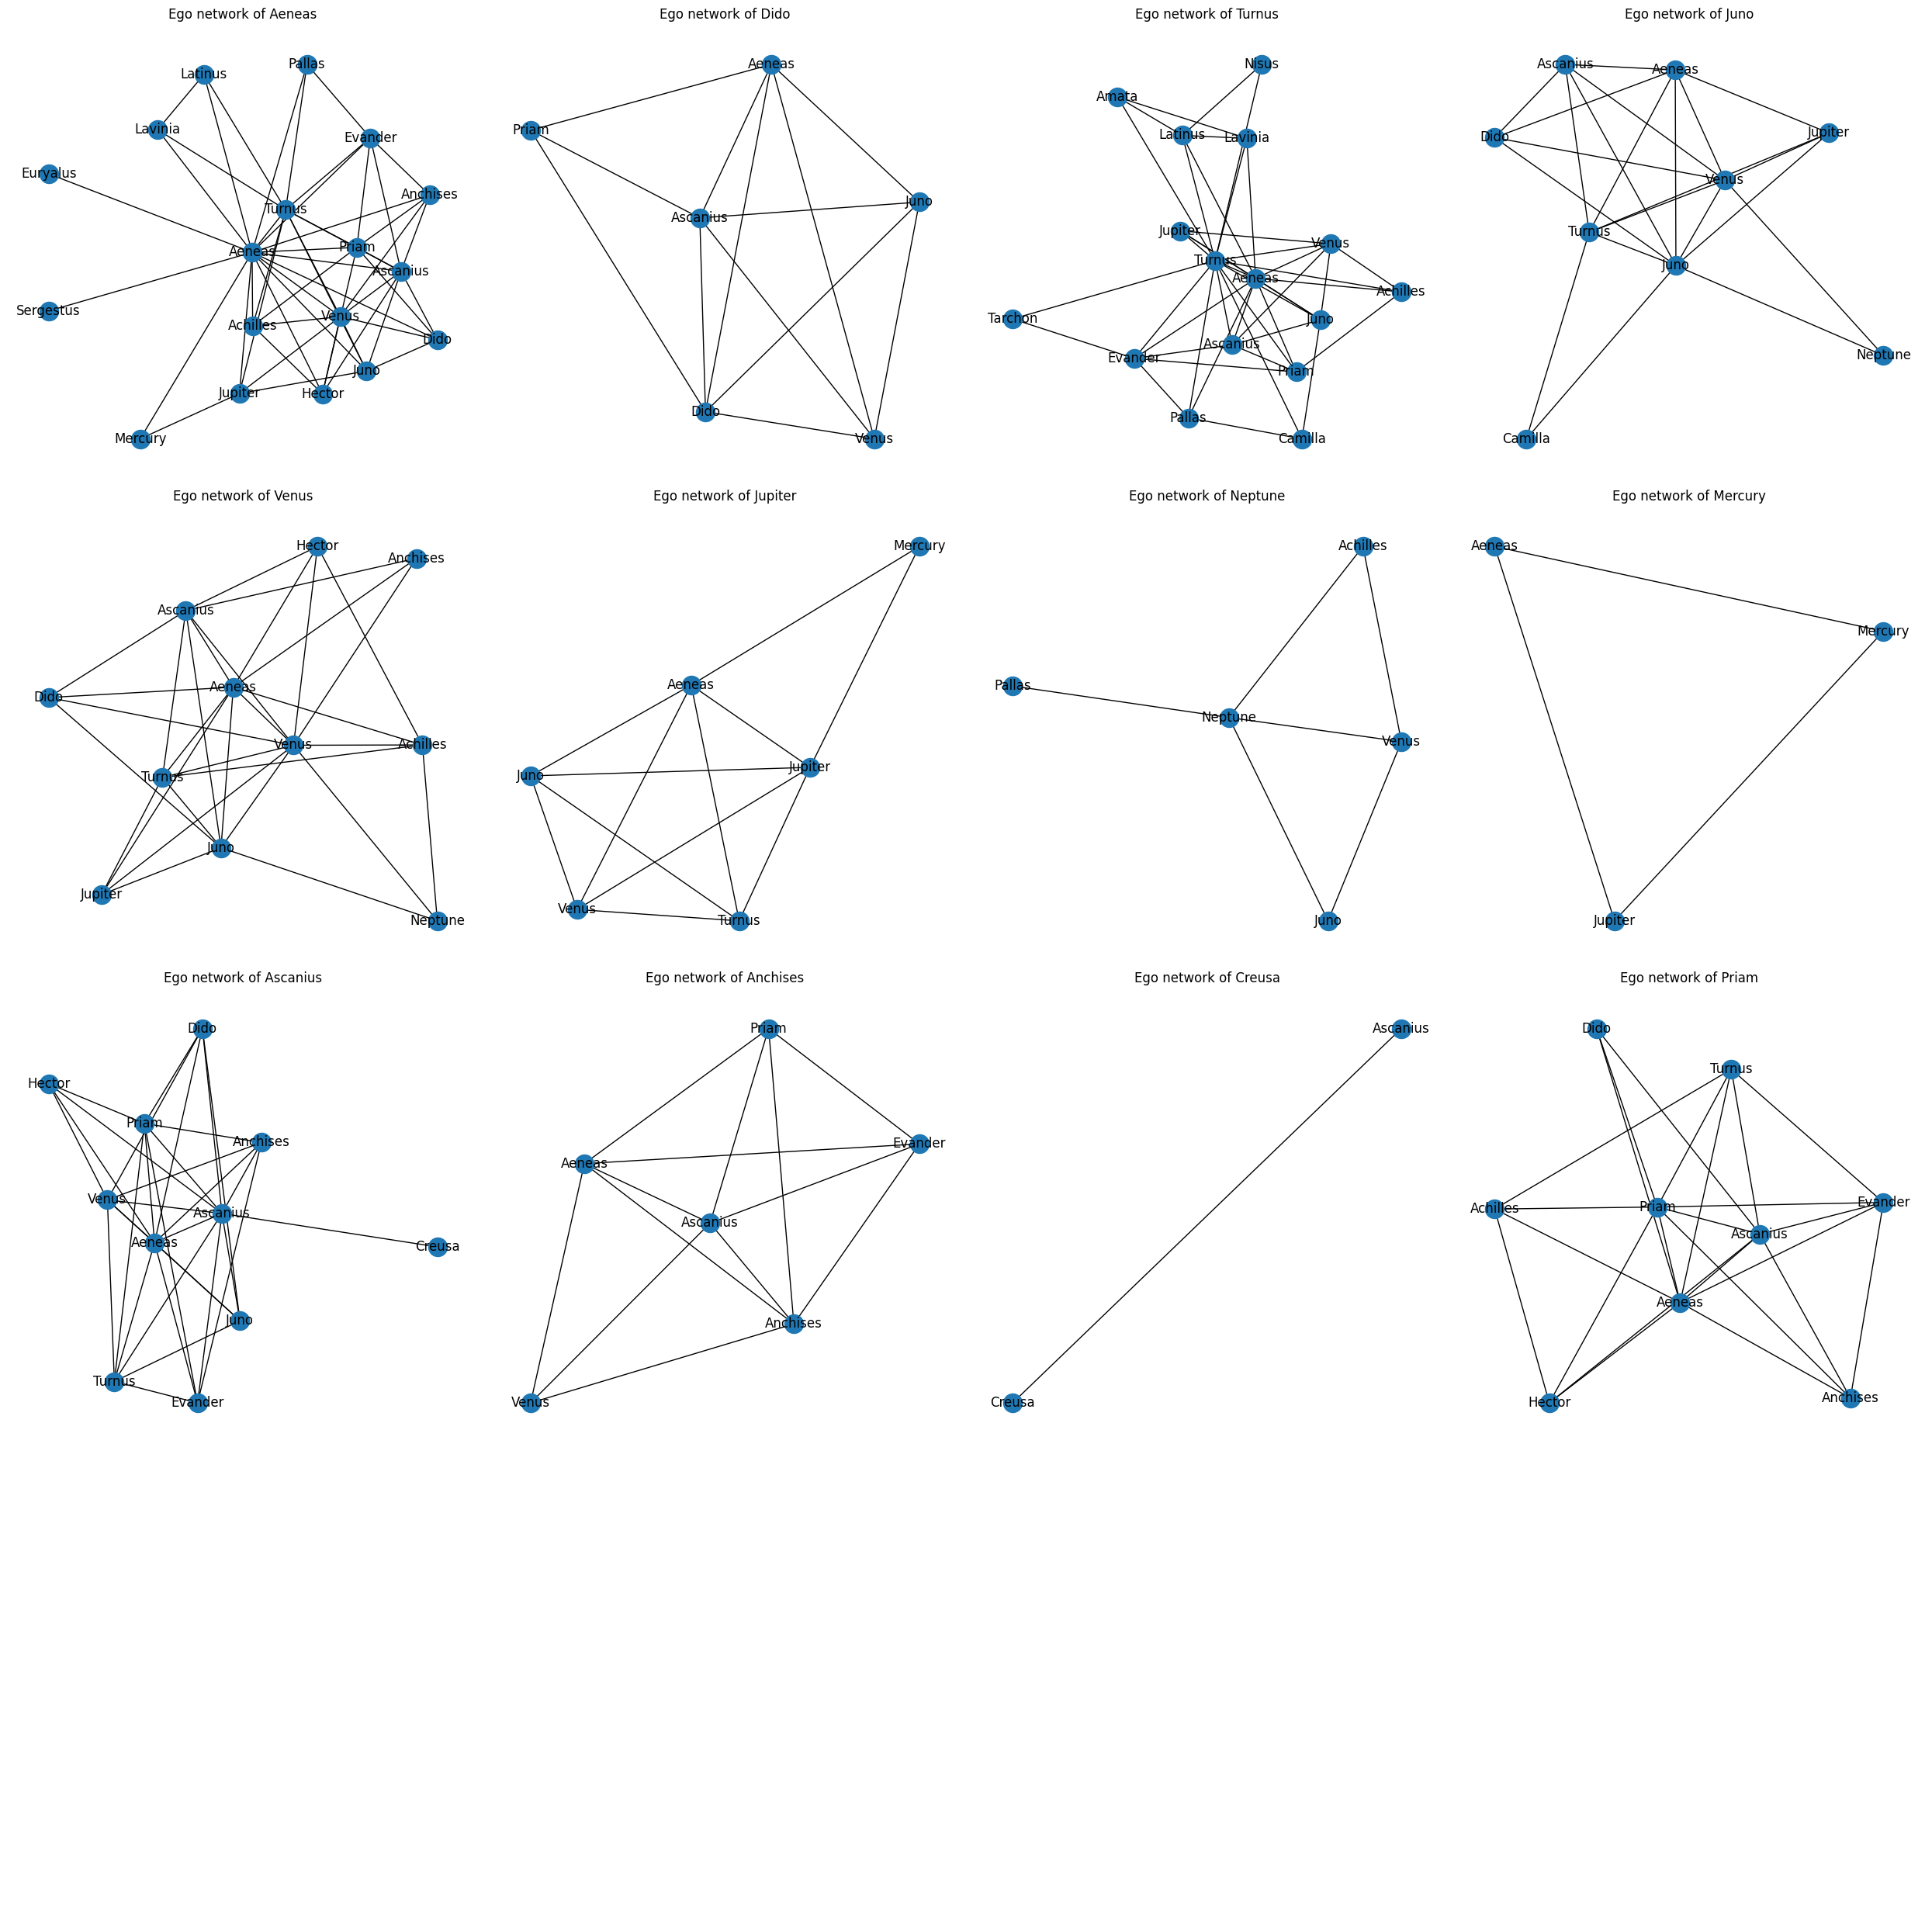

In [ ]:
main_characters = ['Aeneas', 'Dido', 'Turnus', 'Juno', 'Venus', 'Jupiter',
                   'Neptune', 'Mercury', 'Ascanius', 'Anchises', 'Creusa',
                    'Priam']

fig, axes = plt.subplots(4, 4, figsize=(25, 25))
axes = axes.flatten()

local_clustering_coefficients = {}
for i, char in enumerate(main_characters):
    ego_graph = nx.ego_graph(G, char)
    nx.draw(ego_graph, with_labels=True, ax=axes[i])
    axes[i].set_title(f"Ego network of {char}")
    local_clustering_coefficients[char] = nx.clustering(ego_graph)


for i in range(len(main_characters), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
for i in local_clustering_coefficients:
    print(f"Local clustering coefficient of {i}: {local_clustering_coefficients[i]}")

Local clustering coefficient of Aeneas: {'Aeneas': 0.25735294117647056, 'Dido': 0.8, 'Turnus': 0.4, 'Juno': 0.8, 'Venus': 0.5277777777777778, 'Jupiter': 0.7, 'Mercury': 1.0, 'Ascanius': 0.6111111111111112, 'Anchises': 0.8, 'Priam': 0.5714285714285714, 'Hector': 0.8, 'Achilles': 0.8, 'Lavinia': 1.0, 'Latinus': 1.0, 'Pallas': 1.0, 'Evander': 0.7333333333333333, 'Euryalus': 0, 'Sergestus': 0}
Local clustering coefficient of Dido: {'Venus': 1.0, 'Priam': 1.0, 'Aeneas': 0.8, 'Juno': 1.0, 'Dido': 0.8, 'Ascanius': 0.8}
Local clustering coefficient of Turnus: {'Aeneas': 0.4, 'Turnus': 0.26666666666666666, 'Juno': 0.6666666666666666, 'Venus': 0.7333333333333333, 'Jupiter': 1.0, 'Ascanius': 0.7333333333333333, 'Priam': 0.8, 'Achilles': 0.8333333333333334, 'Amata': 1.0, 'Lavinia': 0.8333333333333334, 'Latinus': 0.6, 'Pallas': 0.6666666666666666, 'Evander': 0.6, 'Camilla': 0.6666666666666666, 'Nisus': 1.0, 'Tarchon': 1.0}
Local clustering coefficient of Juno: {'Venus': 0.6190476190476191, 'Turnus'

### e. Community detection algorithms

### Key Parts:

1. **Finding k-Cliques**:
   - The `find_k_cliques` function identifies all cliques of size \( k \) or larger in the graph.
   - The `are_cliques_adjacent` function checks if two cliques share at least \( k-1 \) nodes, indicating adjacency.

2. **Clique Percolation Method**:
   - The `clique_percolation_method` function constructs a new graph where nodes represent k-cliques, and edges connect adjacent cliques.
   - It then identifies communities as connected components in this new graph.

3. **Girvan-Newman Algorithm**:
   - The `girvan_newman_communities` function applies the Girvan-Newman algorithm to detect communities based on edge betweenness centrality.
   - It returns communities when the specified number is reached.

#### CPM

In [ ]:
def find_k_cliques(graph, k):
    cliques = [clique for clique in nx.find_cliques(graph) if len(clique) >= k]
    return [set(clique) for clique in cliques]

def are_cliques_adjacent(clique1, clique2, k):
    return len(clique1.intersection(clique2)) >= (k - 1)

def clique_percolation_method(graph, k):
    k_cliques = find_k_cliques(graph, k)

    clique_graph = nx.Graph()

    for idx, clique in enumerate(k_cliques):
        clique_graph.add_node(idx, clique=clique)

    for i, j in combinations(range(len(k_cliques)), 2):
        if are_cliques_adjacent(k_cliques[i], k_cliques[j], k):
            clique_graph.add_edge(i, j)

    communities = []
    for component in nx.connected_components(clique_graph):
        community = set()
        for idx in component:
            community.update(k_cliques[idx])
        communities.append(community)

    return communities

k = 4

communities = clique_percolation_method(G_connected, k)

for i, community in enumerate(communities):
    print(f"Community {i+1}: {community}")


Community 1: {'Turnus', 'Lavinia', 'Amata', 'Aeneas', 'Latinus'}
Community 2: {'Venus', 'Hector', 'Turnus', 'Priam', 'Jupiter', 'Anchises', 'Aeneas', 'Evander', 'Ascanius', 'Juno', 'Pallas', 'Dido', 'Achilles'}


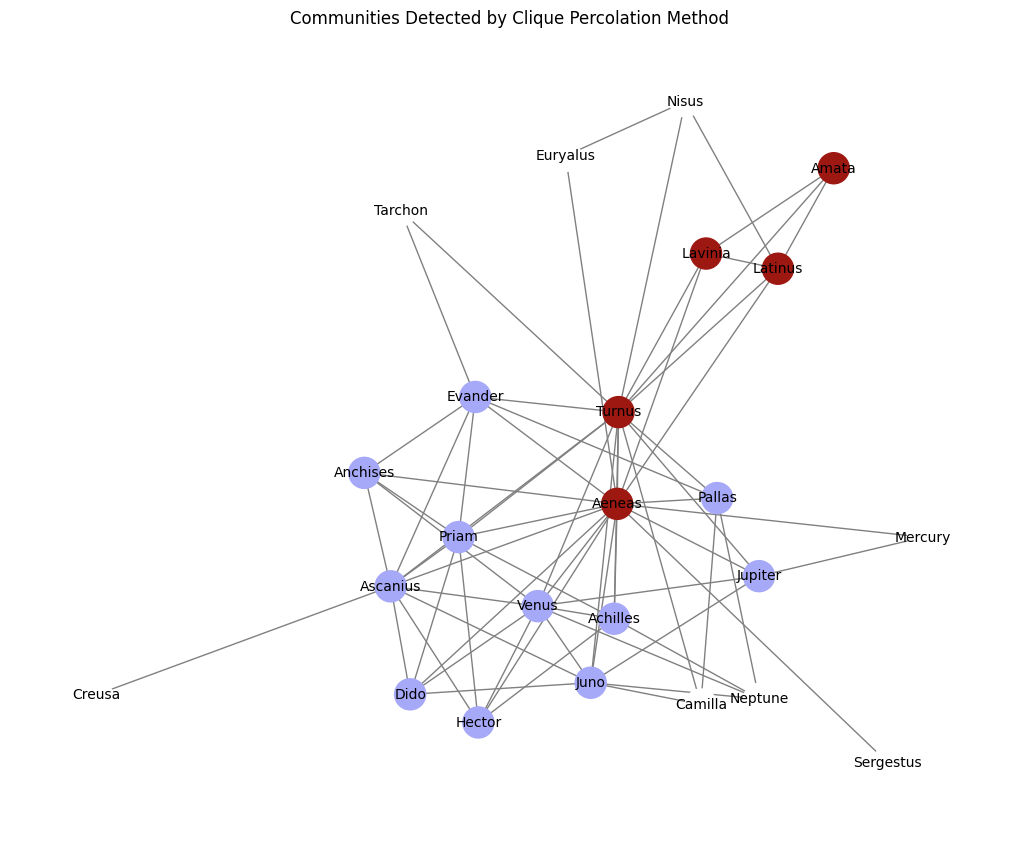

In [ ]:
# To visualize the communities


def visualize_communities(graph, communities):
    pos = nx.spring_layout(graph)

    colors = ['#%06X' % random.randint(0, 0xFFFFFF) for _ in range(len(communities))]

    node_color_map = []
    for node in graph.nodes():
        for i, community in enumerate(communities):
            if node in community:
                node_color_map.append(colors[i])
                break
        else:
            node_color_map.append('#FFFFFF')

    plt.figure(figsize=(10,8))

    nx.draw(graph, pos, node_color=node_color_map, with_labels=True, node_size=500, font_size=10, edge_color='gray')

    plt.title("Communities Detected by Clique Percolation Method")
    plt.show()

visualize_communities(G_connected, communities)

Reasons why ***k is considered to be 4*** for implementation of CPM:

* To find tightly-knit communities.
* To have less overlap between communities, a value of k=4 helps with the same.
* Case in particular is a social network, therefore having a value of k=3 or 4 is proven to be beneficial.
* Also depends on the biggest clique size that can be found within the graph


#### Girvan Newman

In [ ]:
def girvan_newman_communities(graph, num_communities):
    comp_gen = girvan_newman(graph)
    for i, communities in enumerate(comp_gen):
        if len(communities) == num_communities:
            return [list(community) for community in communities]

num_communities = 7

communities = girvan_newman_communities(G_connected, num_communities)

for i, community in enumerate(communities):
    print(f"Community {i+1}: {community}")


Community 1: ['Venus', 'Hector', 'Turnus', 'Camilla', 'Priam', 'Jupiter', 'Anchises', 'Neptune', 'Aeneas', 'Evander', 'Dido', 'Juno', 'Pallas', 'Ascanius', 'Achilles']
Community 2: ['Mercury']
Community 3: ['Creusa']
Community 4: ['Lavinia', 'Latinus', 'Amata']
Community 5: ['Nisus', 'Euryalus']
Community 6: ['Tarchon']
Community 7: ['Sergestus']


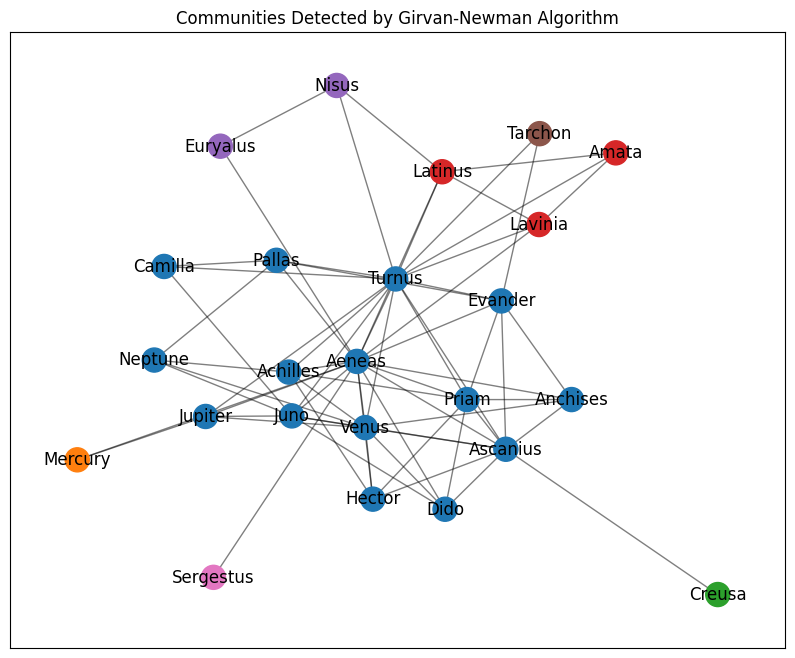

In [ ]:
# To visualize what the communities look like

def plot_girvan_newman_communities(graph, communities):
    pos = nx.spring_layout(graph)
    color_map = list(mcolors.TABLEAU_COLORS.values())
    node_colors = {}

    for i, community in enumerate(communities):
        color = color_map[i % len(color_map)]
        for node in community:
            node_colors[node] = color

    node_list = list(node_colors.keys())
    node_color_list = [node_colors[node] for node in node_list]

    plt.figure(figsize=(10, 8))
    nx.draw_networkx_nodes(graph, pos, nodelist=node_list, node_color=node_color_list, node_size=300)
    nx.draw_networkx_edges(graph, pos, alpha=0.5)
    nx.draw_networkx_labels(graph, pos)

    plt.title("Communities Detected by Girvan-Newman Algorithm")
    plt.show()

plot_girvan_newman_communities(G_connected, communities)

After experimenting with different values for number of communities, the value of 7 gave us the most appropriate representation corresponding to CPM

Why did we observe communities formed being similar to the ones obtained by CPM:
* If the underlying community structure of the graph is relatively simple, both the algorithms can identify similar community partitions, especially if the number of communities is matching to the actual number of communities in the graph

### f. Equivalent Generative Models

#### Key Parts:

1. **Graph Generation**:
   - **Erdős-Rényi Graph**: A random graph generated by connecting nodes with a probability \( p \).
   - **Barabási-Albert Graph**: A scale-free network where new nodes preferentially attach to existing nodes based on their degree.
   - **Watts-Strogatz Graph**: A small-world network that combines high clustering with short average path lengths by randomly rewiring edges.

2. **Graph Metrics Comparison**:
   - The `plot_graph_metrics` function compares the following properties between the generated graphs and the original graph \( G \):
     - **Degree Distribution**: A histogram showing the frequency of each degree in the graphs.
     - **Clustering Coefficient**: A histogram representing how connected a node's neighbors are.
     - **Average Shortest Path Length**: Displays the average number of steps along the shortest paths for pairs of nodes, indicating how quickly information can spread through the graph.



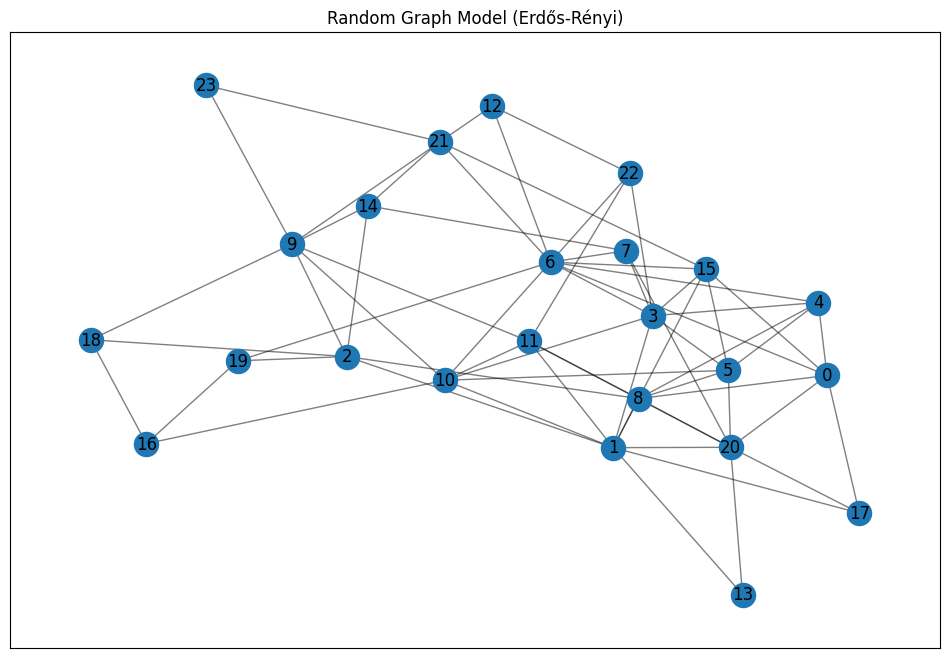

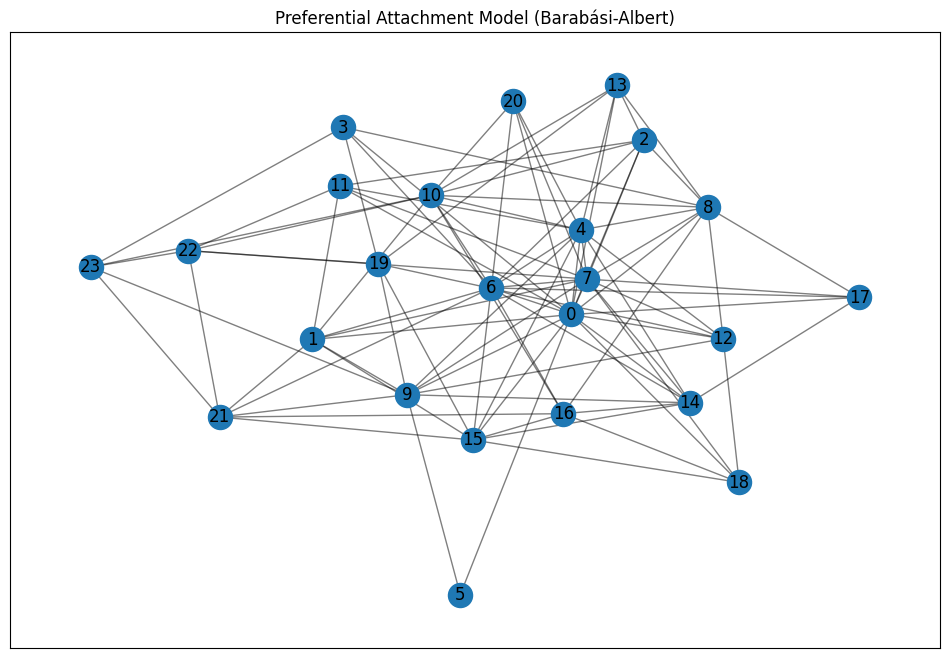

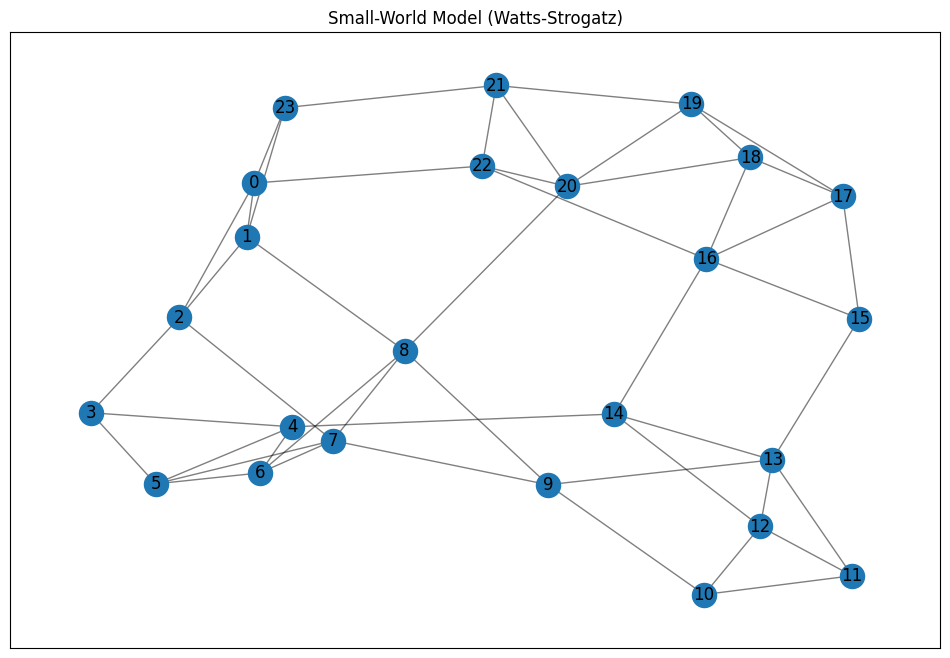

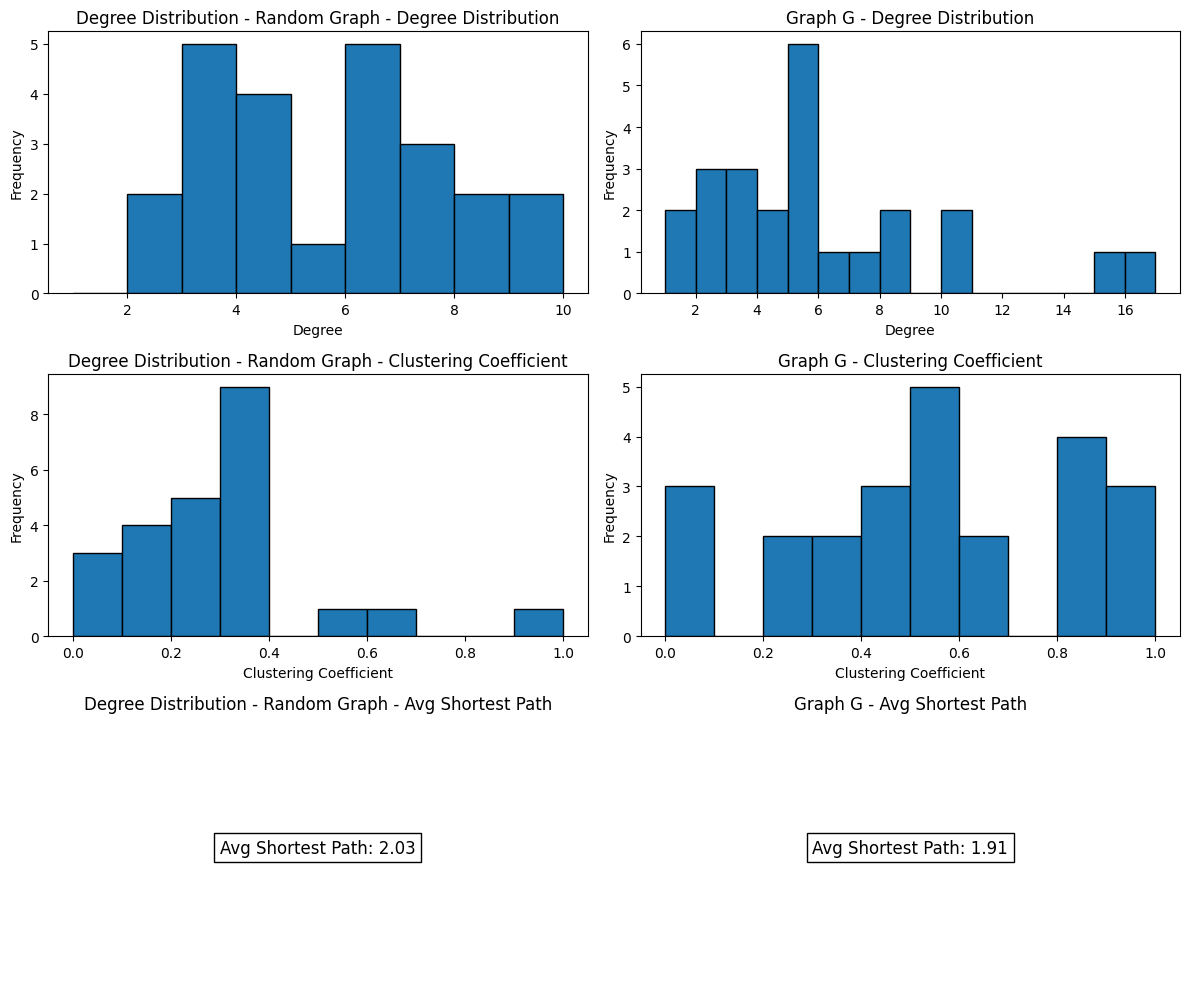

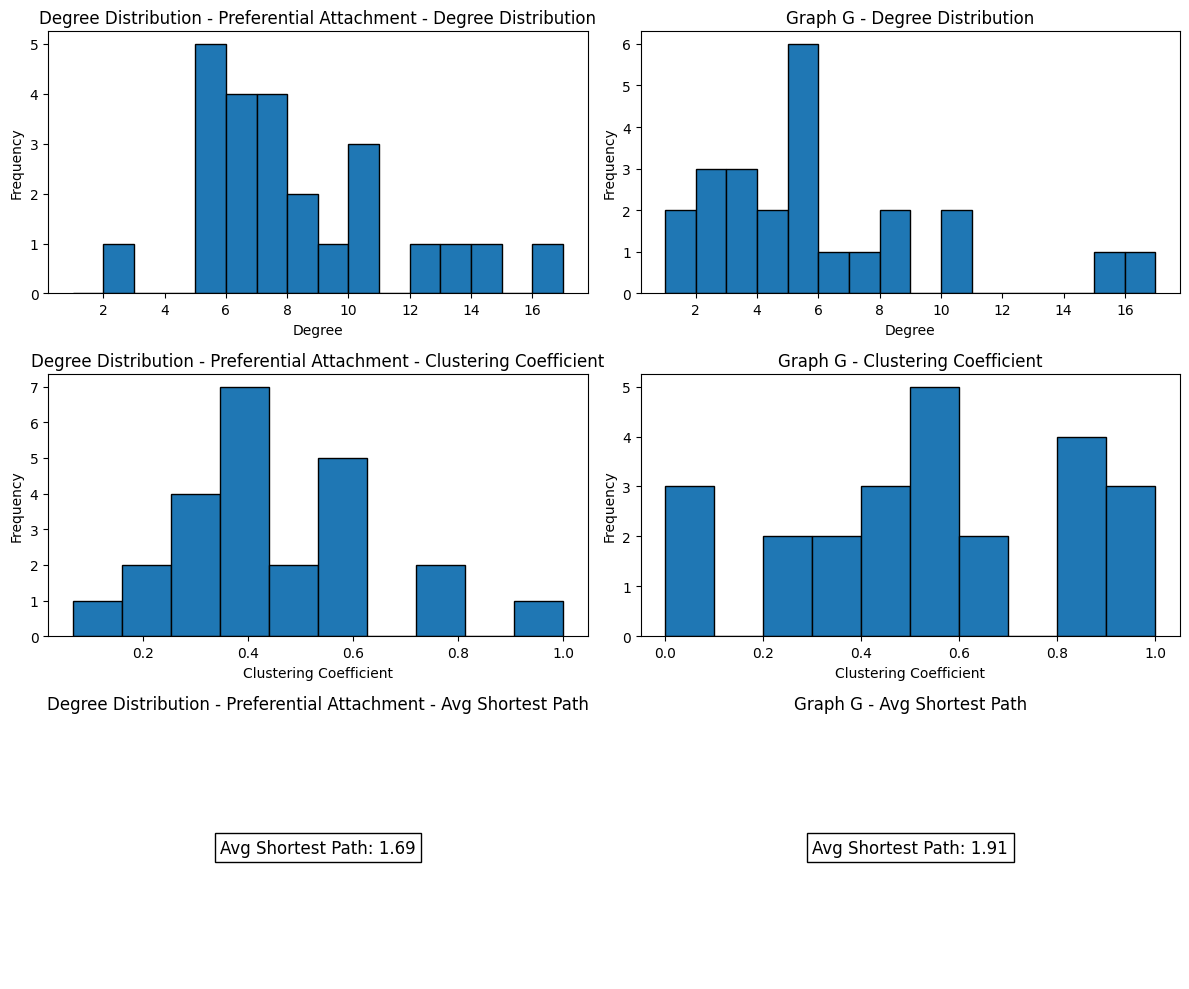

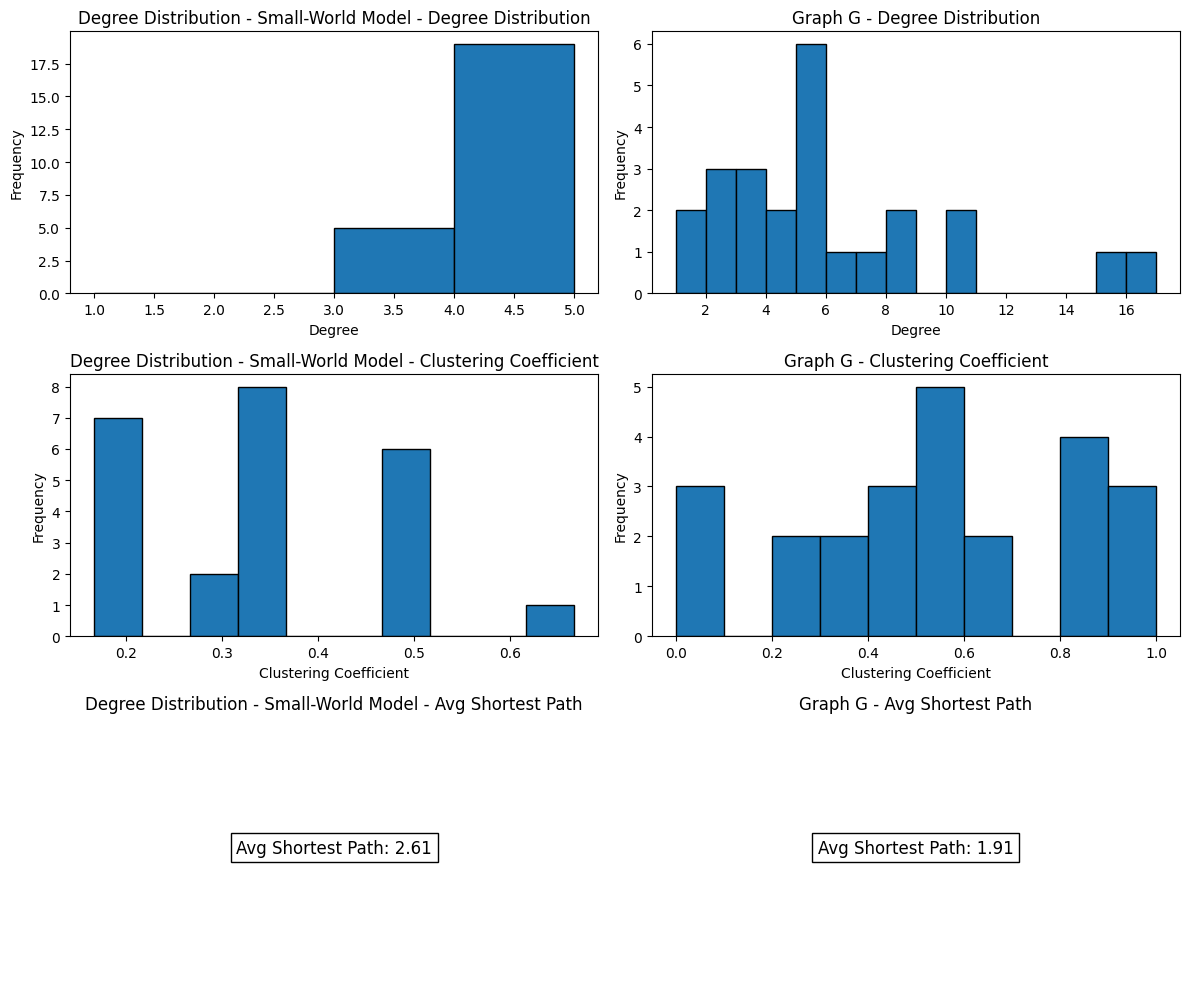

In [ ]:
n = G.number_of_nodes()  # I have taken the original graph without removing the stuff that were "outliers" cuz we need to kinda show those points as well
# For reference
# p = 0.1
# m = 3
# k = 4
avg_degree = sum(dict(G.degree()).values()) / len(G.nodes())

G_random = nx.erdos_renyi_graph(n, avg_degree/n)
G_preferential = nx.barabasi_albert_graph(n, int(avg_degree))
G_small_world = nx.watts_strogatz_graph(n, int(avg_degree), 0.1)

# Tweak the values of p, m and k as needed

def plot_graph(graph, title):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(graph)  # Layout for visualization
    nx.draw_networkx_nodes(graph, pos, node_size=300)
    nx.draw_networkx_edges(graph, pos, alpha=0.5)
    nx.draw_networkx_labels(graph, pos)
    plt.title(title)
    plt.show()

# Plot the generated graphs
plot_graph(G_random, "Random Graph Model (Erdős-Rényi)")
plot_graph(G_preferential, "Preferential Attachment Model (Barabási-Albert)")
plot_graph(G_small_world, "Small-World Model (Watts-Strogatz)")


def plot_graph_metrics(graph1, title1):
    graph2 = G
    title2 = "Graph G"

    degrees1 = [d for n, d in graph1.degree()]
    degrees2 = [d for n, d in graph2.degree()]

    clustering_coeffs1 = list(nx.clustering(graph1).values())
    clustering_coeffs2 = list(nx.clustering(graph2).values())

    avg_shortest_path1 = nx.average_shortest_path_length(graph1) if nx.is_connected(graph1) else None
    avg_shortest_path2 = nx.average_shortest_path_length(graph2) if nx.is_connected(graph2) else None

    fig, axs = plt.subplots(3, 2, figsize=(12, 10))

    axs[0, 0].hist(degrees1, bins=range(1, max(degrees1) + 1), edgecolor='black')
    axs[0, 0].set_title(f'{title1} - Degree Distribution')
    axs[0, 0].set_xlabel('Degree')
    axs[0, 0].set_ylabel('Frequency')

    axs[0, 1].hist(degrees2, bins=range(1, max(degrees2) + 1), edgecolor='black')
    axs[0, 1].set_title(f'{title2} - Degree Distribution')
    axs[0, 1].set_xlabel('Degree')
    axs[0, 1].set_ylabel('Frequency')

    axs[1, 0].hist(clustering_coeffs1, bins=10, edgecolor='black')
    axs[1, 0].set_title(f'{title1} - Clustering Coefficient')
    axs[1, 0].set_xlabel('Clustering Coefficient')
    axs[1, 0].set_ylabel('Frequency')

    axs[1, 1].hist(clustering_coeffs2, bins=10, edgecolor='black')
    axs[1, 1].set_title(f'{title2} - Clustering Coefficient')
    axs[1, 1].set_xlabel('Clustering Coefficient')
    axs[1, 1].set_ylabel('Frequency')

    if avg_shortest_path1 is not None:
        axs[2, 0].text(0.5, 0.5, f"Avg Shortest Path: {avg_shortest_path1:.2f}",
                       horizontalalignment='center', verticalalignment='center',
                       fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))
        axs[2, 0].set_title(f'{title1} - Avg Shortest Path')
        axs[2, 0].axis('off')
    else:
        axs[2, 0].text(0.5, 0.5, "Graph is Disconnected",
                       horizontalalignment='center', verticalalignment='center',
                       fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))
        axs[2, 0].set_title(f'{title1} - Avg Shortest Path')
        axs[2, 0].axis('off')

    if avg_shortest_path2 is not None:
        axs[2, 1].text(0.5, 0.5, f"Avg Shortest Path: {avg_shortest_path2:.2f}",
                       horizontalalignment='center', verticalalignment='center',
                       fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))
        axs[2, 1].set_title(f'{title2} - Avg Shortest Path')
        axs[2, 1].axis('off')
    else:
        axs[2, 1].text(0.5, 0.5, "Graph is Disconnected",
                       horizontalalignment='center', verticalalignment='center',
                       fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))
        axs[2, 1].set_title(f'{title2} - Avg Shortest Path')
        axs[2, 1].axis('off')

    plt.tight_layout()
    plt.show()




plot_graph_metrics(G_random, "Degree Distribution - Random Graph")
plot_graph_metrics(G_preferential, "Degree Distribution - Preferential Attachment")
plot_graph_metrics(G_small_world, "Degree Distribution - Small-World Model")


## Part - 2

### Analysis

### a. Who are the protagonists in the story? Interpret the 4 centralities.

The central characters in *The Aeneid* are well-reflected in the network analysis. The story revolves around **Aeneas**, a Trojan hero, as he embarks on his journey to find a new homeland after the fall of Troy, guided by the will of the gods. The other key characters are:

- **Dido**: The passionate queen of Carthage who falls head over heels for Aeneas.
- **Turnus**: Our main antagonist. His only job it to stand in Aeneas's way when he reaches Italy, and their rivalry is intense.
- **Juno**: The queen of the gods, who has a serious grudge against Aeneas. She keeps throwing obstacles in his way.
- **Venus**: Aeneas’s divine mother, always looking out for him and trying to help him navigate through all the chaos.

#### Degree Centrality

Now, let’s talk about how these characters connect with each other through degree centrality:

- **Aeneas** has the highest degree centrality of **0.739**, making him the most connected character in our network. It makes sense—he’s at the center of everything, interacting with nearly everyone.

- **Turnus** is close with a score of **0.652**. He’s crucial to the plot as Aeneas's main rival, always ready to challenge him.

- **Venus** comes next at **0.435**, showing her strong support for Aeneas throughout his journey.

- **Juno**, with a degree centrality of **0.348**, plays her part as another antagonist who constantly tries to thwart Aeneas's plans.

#### Betweenness Centrality

When we look at betweenness centrality, we see how these characters act as bridges between different parts of the story:

- **Aeneas** leads again with a betweenness centrality of **0.352**. This means he connects various plotlines and characters.

- **Turnus** follows closely with **0.280**, emphasizing his role in creating tension and conflict within the narrative.

- **Ascanius**, Aeneas's son, with a score of **0.108**. He represents hope for the future and connects past events to what’s to come. This was a little surprising since almost everywhere else, it's just Aeneas, Turnus, Venus, Juno, and Dido.

#### Closeness Centrality

Now let’s chat about closeness centrality, which tells us how quickly these characters can reach one another:

- **Aeneas** tops this chart too with a score of **0.793**, indicating he can swiftly connect with others in his network. This works out perfectly since he's always going on a mission.

- **Turnus** (0.742) and **Venus** (0.639) also have high scores, meaning they’re well-positioned to influence events around them quickly. While reading the story, it's also clear that they do. Turnus thwarts, Venus supprts.

#### PageRank (Interpretation)

Finally, let’s look at PageRank, which helps us understand overall importance based on connections:

- Again, **Aeneas** leads with a score of **0.118**, solidifying his status as our main hero whose actions significantly impact everyone around him.

- Following him is **Turnus** at **0.103**, showing that even as an antagonist, he plays a vital role in shaping events surrounding Aeneas.

- Other notable characters like Venus (0.067) and Juno (0.055) also hold their ground in terms of influence.

---

### b. How “realistic” is the story based on your comparison with the equivalent Generative Model, i.e., fact or fiction?

The analysis of the network provides insight into the realism of the story when compared to real-world social networks or even generative models based on real-life data. Here are some key aspects to consider:

#### Dense Network Structure

- The network is densely connected, with **68 edges** and **28 nodes**. In a realistic social network, protagonists like Aeneas would likely have high connectivity due to his leadership role.
- However, the degree of interconnectedness between gods (like **Juno**, **Venus**, **Jupiter**) and mortals (such as **Aeneas**, **Turnus**, and **Ascanius**) indicates that this narrative is rooted in mythology and fiction
- In a real-world generative model, you'd expect more clustering among similar groups (e.g., family, allies) and fewer direct connections between such different entities as gods and humans.

#### Divine-Mortal Relationships

- The prominent role of divine figures like **Juno** and **Venus** shows that the network reflects a fictional mythological world where gods intervene directly in human affairs.
- If a generative model based on real-world interactions were to produce a network, you'd likely observe fewer direct interactions between characters of such differing "domains" (i.e., divine and mortal).
- This interweaving of gods and humans creates an unrealistic aspect, signaling the mythological nature of *The Aeneid*.

#### More on Generative Models

- If a generative model based on real-world data were to create a similar graph, we would expect to see fewer cross-domain interactions (e.g., gods influencing human actions so directly).
- Instead, real-world leaders or protagonists would interact primarily with other humans in tightly knit groups.
- The high number of connections between divine and mortal figures in this network **deviates from the more segmented or clustered structure typically seen in realistic social networks.**

Thus, the network reflects a fictional world where the interaction between gods and humans is central to the plot—something that wouldn't happen in a generative model based on real-world social data. This blending of divine and mortal interactions highlights the mythological, fictional foundation of *The Aeneid*, as compared to the patterns of interaction found in more realistic narratives.

---

### c. Does your graph analytics capture the twists in the story in any way?

#### Community Detection (CPM and Girvan Newman)

The **CPM** output shows a strong community involving **Aeneas**, **Turnus**, **Venus**, **Juno**, and other major figures, effectively capturing the conflict between Aeneas and Turnus, with divine interference from Juno and Venus. This aligns with the major plot arc in which divine forces shape the fate of mortals.

The **Girvan-Newman** algorithm breaks the graph into smaller, more isolated communities:

- **Community 1**: Comprising Aeneas, Dido, Hector, etc., this community reflects the Trojan war survivors and the immediate connections Aeneas forms.

- **Community 4**: Including Latinus, Amata, and Lavinia, this community represents the Italian royals connected to Aeneas’s later journey, illustrating the transition to the war in Italy.

- **Community 5**: Capturing Nisus and Euryalus, this smaller community highlights the subplot of their close friendship and heroism.

The community structure effectively captures the multiple arcs of the narrative, particularly the shift from the Trojan setting to the conflict in Italy, as well as smaller character arcs.

#### Twists in the Story

The graph also reflects major twists in the narrative:

- The disconnection of Dido from Aeneas after their interaction is evident through her relatively low degree centrality and her placement in a smaller community. This aligns with her tragic fate following Aeneas's departure from Carthage.

- The separate community of Lavinia and Amata illustrates the Italian royal subplot and their isolation from the main story until the final act.

---

Fin.

---

